### Load and Preview Doctor Columns

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/raw/healthcare_analytics_dataset.csv")

# Check relevant columns
df[
    [
        "doctor_id",
        "doctor_specialty",
        "satisfaction_score",
        "length_of_stay",
        "readmitted_within_30_days",
        "doctor_rating",
    ]
].head()

,doctor_id,doctor_specialty,satisfaction_score,length_of_stay,readmitted_within_30_days,doctor_rating
0,DID008,Cardiology,1,3,Yes,2
1,DID023,Oncology,6,7,No,2
2,DID020,Pulmonology,10,13,No,3
3,DID025,Pulmonology,6,2,No,3
4,DID006,Endocrinology,1,7,No,4


### Clean Columns

In [2]:
# Convert readmission from Yes/No to 1/0
df["readmitted_within_30_days"] = df["readmitted_within_30_days"].map(
    {"Yes": 1, "No": 0}
)

# Drop rows where doctor_id or doctor_rating is missing (optional)
df = df.dropna(subset=["doctor_id", "doctor_rating"])

### Create Aggregated Doctor Summary Table

In [3]:
doctor_summary = (
    df.groupby(["doctor_id", "doctor_specialty"])
    .agg(
        appointments=("appointment_id", "count"),
        avg_rating=("doctor_rating", "mean"),
        avg_satisfaction=("satisfaction_score", "mean"),
        avg_stay=("length_of_stay", "mean"),
        readmission_rate=("readmitted_within_30_days", "mean"),
    )
    .reset_index()
)

# Round values for neatness
doctor_summary = doctor_summary.round(2)

# Preview
doctor_summary.head()

,doctor_id,doctor_specialty,appointments,avg_rating,avg_satisfaction,avg_stay,readmission_rate
0,DID001,Cardiology,4,4.0,7.50,11.00,0.0
1,DID001,Endocrinology,5,3.4,5.80,6.00,0.4
2,DID001,General,1,3.0,6.00,4.00,0.0
3,DID001,Pulmonology,2,2.0,8.00,8.50,0.0
4,DID002,Cardiology,4,3.5,6.25,7.75,0.0


### Save Aggregated Data for Power BI

In [5]:
doctor_summary.to_csv("../data/processed/cleaned/doctor_performance_summary.csv", index=False)
print(
    "✅ Aggregated doctor summary saved to /data/processed/cleaned/doctor_performance_summary.csv"
)

✅ Aggregated doctor summary saved to /data/processed/cleaned/doctor_performance_summary.csv


### Plot Top 10 Doctors by Rating

C:\Users\HP\AppData\Local\Temp\ipykernel_1348\2483757847.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="doctor_id", x="avg_rating", data=top_doctors, palette="Blues_d")


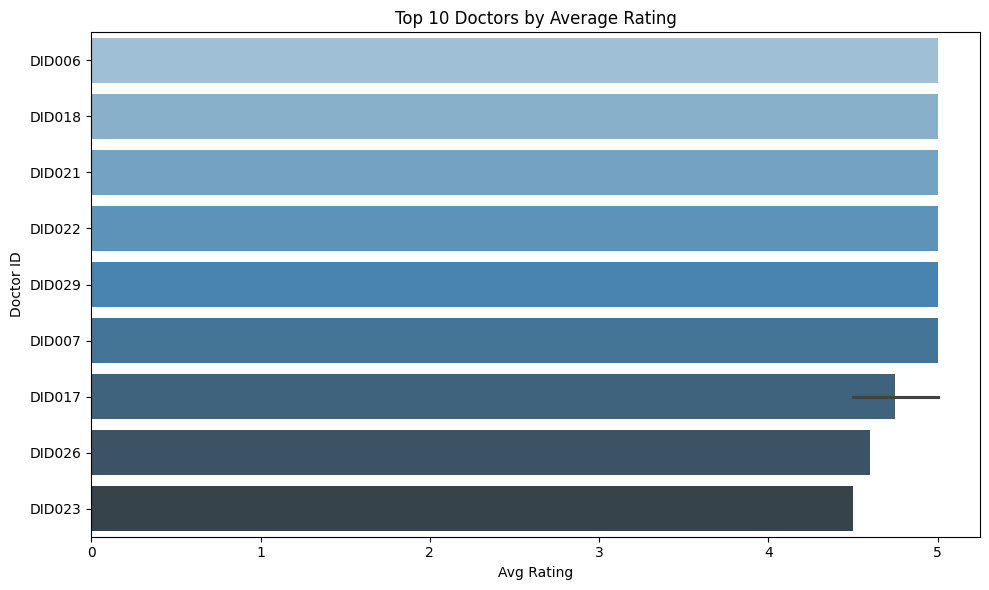

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure visuals directory
os.makedirs("../visuals/plots", exist_ok=True)

top_doctors = doctor_summary.sort_values(by="avg_rating", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y="doctor_id", x="avg_rating", data=top_doctors, palette="Blues_d")
plt.title("Top 10 Doctors by Average Rating")
plt.xlabel("Avg Rating")
plt.ylabel("Doctor ID")
plt.tight_layout()
plt.savefig("../visuals/plots/top_doctors_by_rating.png")
plt.show()

### Correlation Heatmap Between KPIs

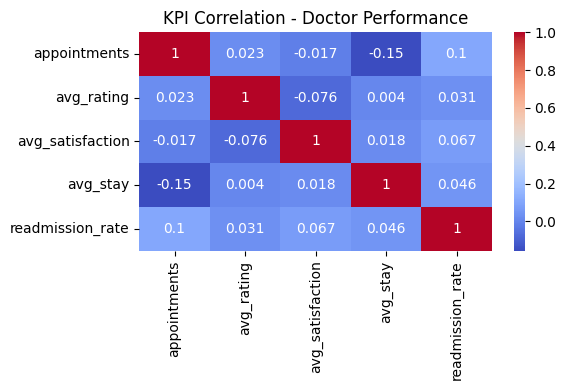

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    doctor_summary.drop(columns=["doctor_id", "doctor_specialty"]).corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("KPI Correlation - Doctor Performance")
plt.tight_layout()
plt.savefig("../visuals/plots/doctor_kpi_correlation.png")
plt.show()